# 3.1.3 [KNN Regression](https://courses.thinkful.com/data-201v1/project/3.1.3)

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

music = pd.DataFrame()
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]
music['bpm'] = [ 105, 90, 78, 75, 120, 110, 80, 100, 105, 60,
                  70, 105, 95, 70, 90, 105, 70, 75, 102, 100,
                  100, 95, 90, 80, 90, 80, 100, 105, 70, 65]

In [39]:
# Build our model.
# Instantiate knn & knn weighted models
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')

# Define freatures and target
X = music[['loudness','duration']]
Y = music.bpm

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighed Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

score = cross_val_score(knn, X_scaled, Y, cv=5)
print("Unweighted Accuracy Using Scaled X: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X_scaled, Y, cv=5)
print("Weighed Accuracy Using Scaled X: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.42 (+/- 0.78)
Weighed Accuracy: -0.26 (+/- 0.74)
Unweighted Accuracy Using Scaled X: -0.19 (+/- 0.62)
Weighed Accuracy Using Scaled X: -0.17 (+/- 1.11)


In [41]:
print(X_scaled)

[[ 0.29787234  0.27242525]
 [ 0.63829787  0.10631229]
 [ 0.82978723  0.46843854]
 [ 0.68085106  0.27906977]
 [ 0.38297872  0.06644518]
 [ 0.10638298  0.31561462]
 [ 0.53191489  0.63787375]
 [ 0.38297872  0.93023256]
 [ 0.12765957  0.        ]
 [ 0.42553191  0.53820598]
 [ 0.34042553  0.34219269]
 [ 0.12765957  0.02657807]
 [ 0.27659574  0.68106312]
 [ 1.          0.02657807]
 [ 0.06382979  0.98006645]
 [ 0.19148936  0.16943522]
 [ 0.31914894  0.2923588 ]
 [ 0.17021277  0.29900332]
 [ 0.36170213  0.35880399]
 [ 0.38297872  1.        ]
 [ 0.25531915  0.20598007]
 [ 0.29787234  0.31893688]
 [ 0.          0.33887043]
 [ 0.40425532  0.50166113]
 [ 0.63829787  0.43853821]
 [ 0.31914894  0.2923588 ]
 [ 0.21276596  0.26578073]
 [ 0.14893617  0.99335548]
 [ 0.70212766  0.910299  ]
 [ 0.80851064  0.        ]]


In [31]:
# Trying to see if scaling the data helps
from sklearn.preprocessing import MinMaxScaler
# I guess this is a model so instantiate the model
scaler = MinMaxScaler()
print(scaler)
X_scaled = scaler.fit_transform(X)
print(scaler)
print(X_scaled)



MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))
[[ 0.29787234  0.27242525]
 [ 0.63829787  0.10631229]
 [ 0.82978723  0.46843854]
 [ 0.68085106  0.27906977]
 [ 0.38297872  0.06644518]
 [ 0.10638298  0.31561462]
 [ 0.53191489  0.63787375]
 [ 0.38297872  0.93023256]
 [ 0.12765957  0.        ]
 [ 0.42553191  0.53820598]
 [ 0.34042553  0.34219269]
 [ 0.12765957  0.02657807]
 [ 0.27659574  0.68106312]
 [ 1.          0.02657807]
 [ 0.06382979  0.98006645]
 [ 0.19148936  0.16943522]
 [ 0.31914894  0.2923588 ]
 [ 0.17021277  0.29900332]
 [ 0.36170213  0.35880399]
 [ 0.38297872  1.        ]
 [ 0.25531915  0.20598007]
 [ 0.29787234  0.31893688]
 [ 0.          0.33887043]
 [ 0.40425532  0.50166113]
 [ 0.63829787  0.43853821]
 [ 0.31914894  0.2923588 ]
 [ 0.21276596  0.26578073]
 [ 0.14893617  0.99335548]
 [ 0.70212766  0.910299  ]
 [ 0.80851064  0.        ]]


In [33]:
X_scaled[:,1]

array([ 0.27242525,  0.10631229,  0.46843854,  0.27906977,  0.06644518,
        0.31561462,  0.63787375,  0.93023256,  0.        ,  0.53820598,
        0.34219269,  0.02657807,  0.68106312,  0.02657807,  0.98006645,
        0.16943522,  0.2923588 ,  0.29900332,  0.35880399,  1.        ,
        0.20598007,  0.31893688,  0.33887043,  0.50166113,  0.43853821,
        0.2923588 ,  0.26578073,  0.99335548,  0.910299  ,  0.        ])

In [30]:
cross_val_score(knn, X, Y, cv=3)

array([-0.00580525, -0.20718413, -0.03049922])

# KNN Regression

### Switching KNN Classifier to a Regression
* Classifier - $k$ observations voted for a $category$
* Regression - $k$ observations vote for a $value$, instead of taking the most popular response, the algorithm averages the votes. If the regression has weights use weighted average

### Predict BPM (beats per minute) in terms of loudness

In [24]:
from sklearn import neighbors

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = music[['loudness','duration']]
Y = music.bpm
knn.fit(X,Y)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='uniform')

In [25]:
# Set up the prediction line.
T = np.arange(0,50,0.1)[:, np.newaxis]

In [26]:
# Trailing underscores are a common convention for predictions
Y_ = knn.predict(T)

ValueError: query data dimension must match training data dimension

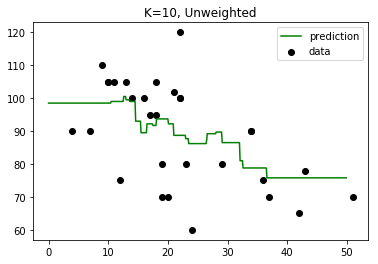

In [7]:
plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

In [8]:
# Run the same model, this time with weights.
knn_w = neighbors.KNeighborsRegressor(
    n_neighbors=10, weights='distance')
X = pd.DataFrame(music.loudness)
Y = music.bpm
knn_w.fit(X,Y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='distance')

In [18]:
# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]

In [20]:
Y_ = knn_w.predict(T)

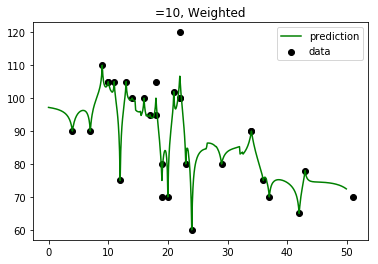

In [21]:
plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('=10, Weighted')
plt.show()

## Validating KNN
* Validating KNN as a regression or a classifier is the same as previous models
* Cross validation
* Holdouts
* R-squared value for the regression

Validate the overfit weighted regression using k-fold cross validation below

In [38]:
# Build our model.
# Instantiate knn & knn weighted models
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')

# Define freatures and target
X = music[['loudness']]
Y = music.bpm
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighed Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))



Unweighted Accuracy: -0.18 (+/- 0.66)
Weighed Accuracy: 0.11 (+/- 0.94)
